# AirBnB New York Project

The dataset can be found on Kaggle through this website: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data. This project entails data wrangling, preprocessing and visualization. It aims to employ machine learning method to do housing price prediction.

### Description of the data

###### Context:

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

###### Content:

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

### Project description

Outline of the project and step by step explanation

###### 1) Data wrangling and cleansing:

- Import all necessary packages and libraries such as pandas, numpy, seaborn, matplotlib
- Load dataset in csv form
- Get a general description of the dataset by using .shape(), .info(), .describe()

###### 2) Exploratory data analysis:
- Learn variable types
- Identify which columns have missing or null values
- Replace null values with appropriate values depending on the nature of information

###### 3) Data visualization:
- Plot all the neighborhood groups
- Get correlation between different values
- Plot all the neighborhood in each neighborhood groups
- Plot all the room types
- Correlation between neighborhood_group and availability
- Map of neighborhood group

###### 4) Machine learning - Price prediction: 
- Use linear regression
- Calculate mean absolute error and mean squared error
- Display the actual prices and predicted prices after training the model (30%)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings
import csv
import os
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
airbnb = pd.read_csv('AirBnBNewYork.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [7]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.fillna({'name':"NoName"}, inplace=True)
airbnb.fillna({'host_name':"NoName"}, inplace=True)
airbnb.fillna({'last_review':"NotReviewed"}, inplace=True)

In [8]:
airbnb.drop(['id','name','last_review'],axis =1 , inplace = True)

In [9]:
airbnb.head(100)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,44145,Tyrome,Brooklyn,Bushwick,40.70093,-73.92609,Entire home/apt,105,3,118,1.05,2,9
96,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,0.71,1,198
97,82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,0.11,1,365
98,83257,Olan,Manhattan,Chelsea,40.74008,-74.00271,Private room,98,30,30,0.27,2,364


#### Plot all the neighborhood groups

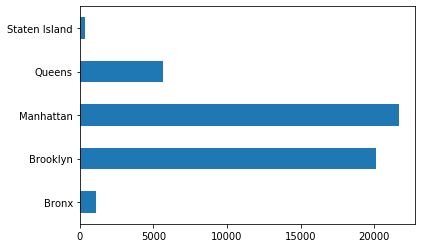

In [10]:
# Which neighborhood_group has the most AirBnB?
airbnb['neighbourhood_group'].value_counts().sort_index().plot.barh()


Mahattan and Brooklyn are two places with the most AirBnB houses. The reason behind this is that most touristy destinations are in those two main places, while in the three other neighborhood groups (Queens, Bronx, Staten Island) have more residential areas and less places to visit.

#### Get correlation between different values

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

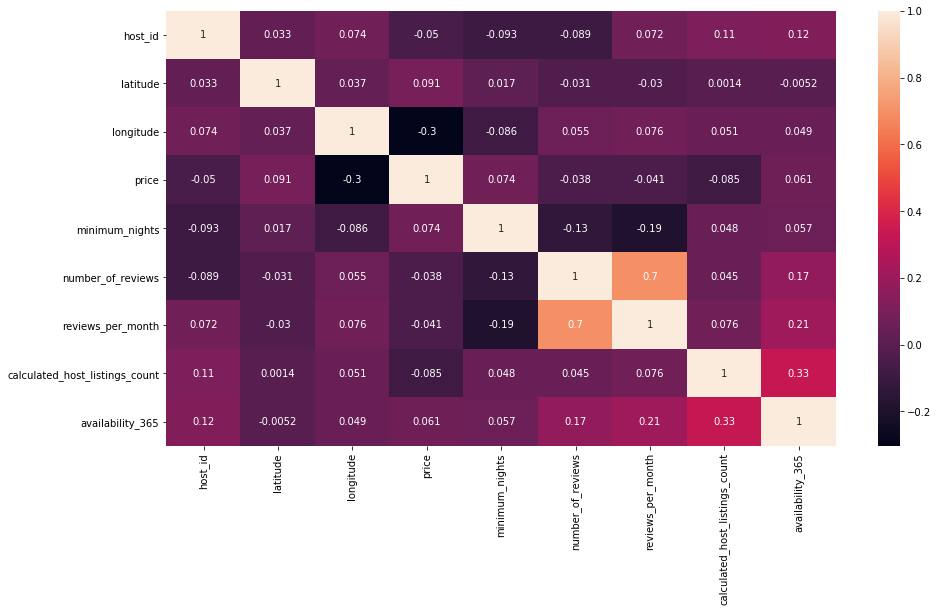

In [11]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

#### Plot all the neighborhood in each neighborhood groups

Text(0.5, 1.0, 'Neighbourhood')

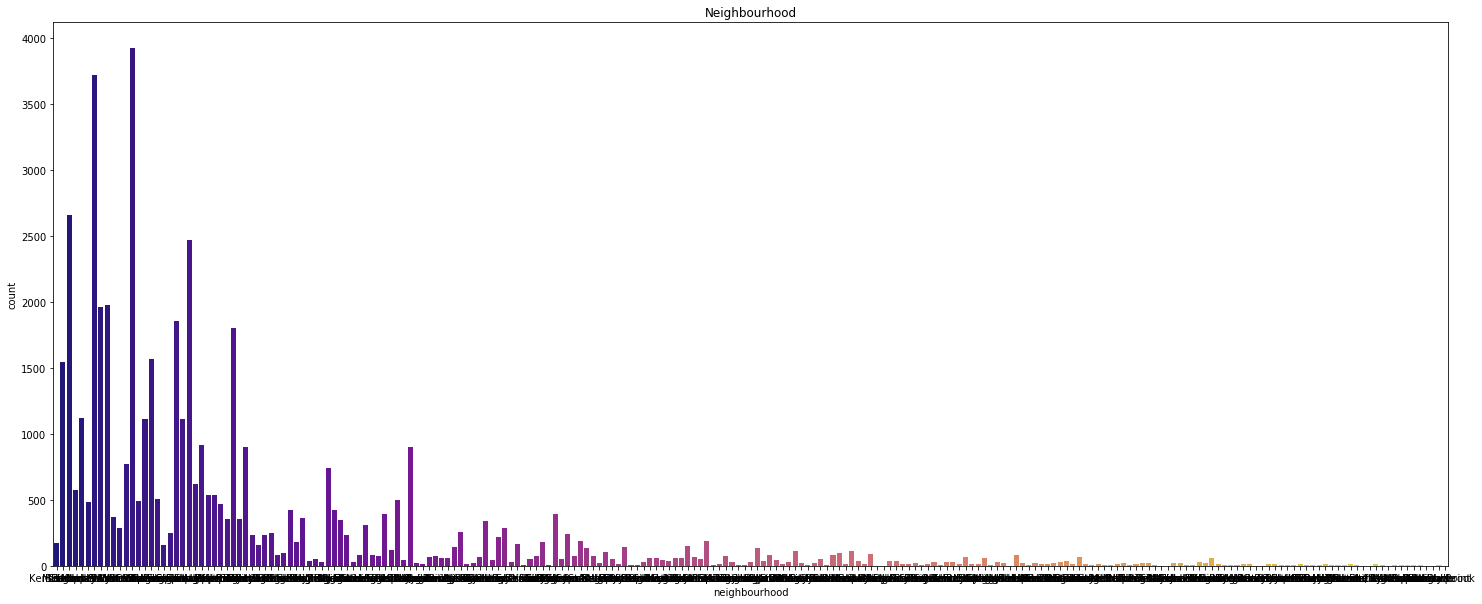

In [12]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,10)
plt.title('Neighbourhood')

#### Plot all the room types

Text(0.5, 1.0, 'Room Type in AirBnB New York')

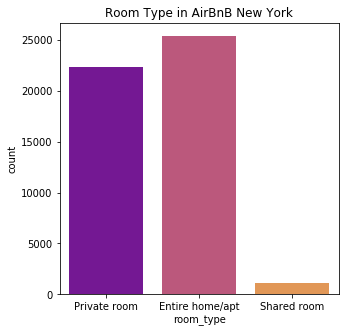

In [13]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Room Type in AirBnB New York')

#### Correlation between neighborhood_group and availability

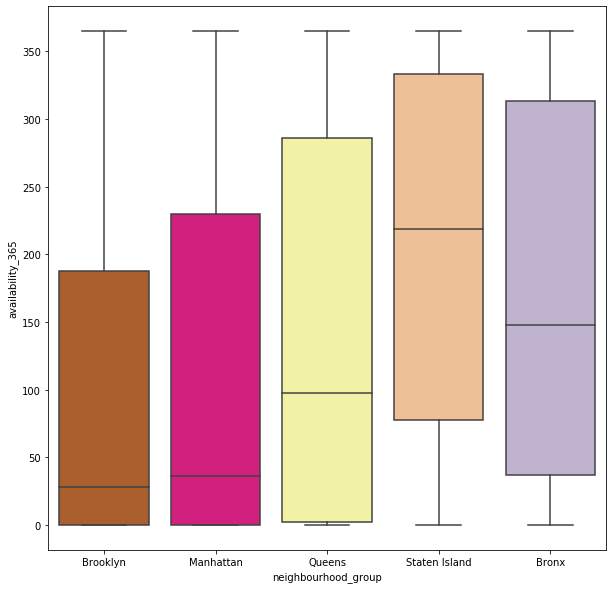

In [14]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='Accent_r')

#### Map of neighborhood group

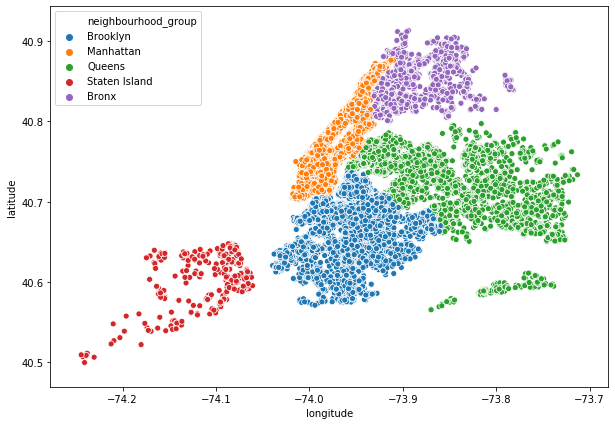

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

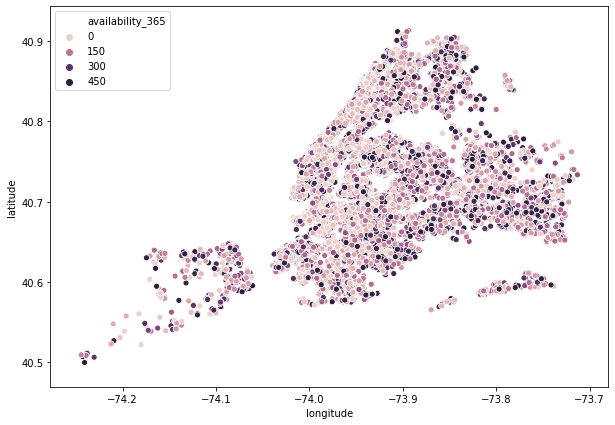

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

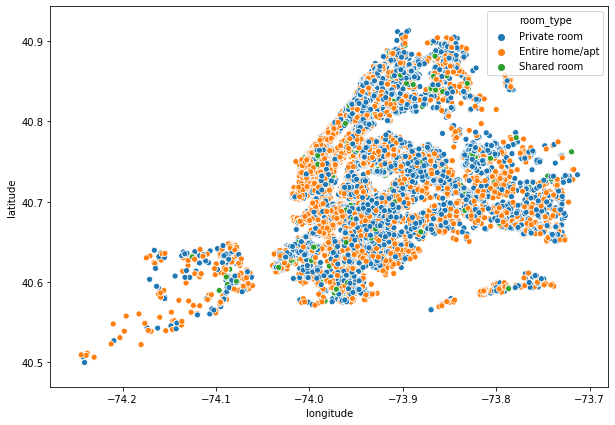

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.room_type)
plt.ioff()

#### From machine learning tools to housing price prediction

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [19]:
airbnb.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [20]:
airbnb.drop(['host_id','host_name','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0


In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
airbnb['neighbourhood_group'] = labelencoder.fit_transform(airbnb['neighbourhood_group'])
airbnb['neighbourhood'] = labelencoder.fit_transform(airbnb['neighbourhood'])
airbnb['room_type'] = labelencoder.fit_transform(airbnb['room_type'])

In [22]:
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,6,365
1,2,127,40.75362,-73.98377,0,225,1,2,355
2,2,94,40.80902,-73.94190,1,150,3,1,365
3,1,41,40.68514,-73.95976,0,89,1,1,194
4,2,61,40.79851,-73.94399,0,80,10,1,0


In [30]:
airbnb[['neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','calculated_host_listings_count','availability_365','price']]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,1,108,40.64749,-73.97237,1,1,6,365,149
1,2,127,40.75362,-73.98377,0,1,2,355,225
2,2,94,40.80902,-73.94190,1,3,1,365,150
3,1,41,40.68514,-73.95976,0,1,1,194,89
4,2,61,40.79851,-73.94399,0,10,1,0,80
...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,2,9,70
48891,1,28,40.70184,-73.93317,1,4,2,36,40
48892,2,94,40.81475,-73.94867,0,10,1,27,115
48893,2,95,40.75751,-73.99112,2,1,6,2,55


In [33]:
#Defining the independent variables and dependent variables
x = airbnb.iloc[:,[0,7]]
y = airbnb['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.3,random_state=353)


In [34]:
# instantiate, fit
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = linreg.predict(x_test)
print('Accuracy of linear regression classifier on test set: {:.2f}'.format(linreg.score(x_test, y_test)))

Accuracy of linear regression classifier on test set: 0.01


In [43]:
predictions = linreg.predict(x_test)

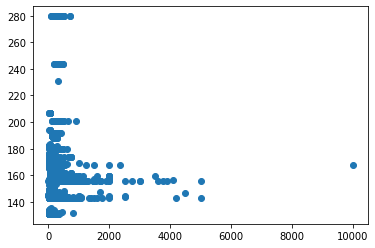

In [44]:
plt.scatter(y_test,predictions)

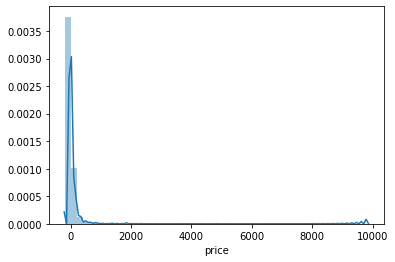

In [46]:
sns.distplot((y_test-predictions),bins=50)

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 88.65445938399371
MSE: 40449.57360779022
RMSE: 201.12079357388737


In [48]:
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
error['prediction']=np.array(predictions)
error.head(10)

,actual,prediction
0,99,143.575739
1,75,167.656046
2,260,143.194944
3,200,155.806290
4,135,143.194944
5,35,156.567880
6,225,155.425495
7,35,149.287662
8,280,158.852649
9,125,143.194944


Overall, with an accuracy score of 1%, I would conclude this is a bad data. In order to improve the data quality and accuracy score, I think we would need to add more feature variables and have more rows. 